### Importación de Tensorflow

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%tensorflow_version 1.x

### Importación de datos 

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("input/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting input/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting input/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting input/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting input/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

### verificando los datos de prueba

In [4]:
mnist.train.images.shape

(55000, 784)

In [0]:
imagendemo=np.reshape(mnist.train.images[2,:],(28,28))

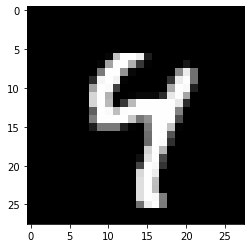

In [6]:
plt.imshow(imagendemo,cmap='gray')

### Declarando la arquitectura

Generando función 

In [0]:
def Neural_network_model(
    n_nodes_hl1=500,
    n_nodes_hl2=500,
    n_nodes_hl3=500,
    keep_rate = 0.8,
    n_classes=10
    ):
    # Declarando las entradas y salidas
    x=tf.placeholder('float',[None,784])
    y=tf.placeholder('float')
    
    #Imagenes 
    img = tf.reshape(x, shape=[-1, 28, 28, 1]) #Dimensiones de la imagen (28*28*1), -1 = indica que mantenga el tamaño del batch en las entradas(x)
    # Declarando las variables 
    weights = {'W_conv1':tf.Variable(tf.random_normal([5,5,1,32])), #Primeras dos dimensiones son el tamaño del kernel, 3 argumento=profundidad del kernel, 4to argumento = número de filtros(neuronas) de este tipo que requiero
               'W_conv2':tf.Variable(tf.random_normal([5,5,32,64])),
               'W_conv3':tf.Variable(tf.random_normal([5,5,64,128])),
               'W_fc':tf.Variable(tf.random_normal([4*4*128,1024])),
               'out':tf.Variable(tf.random_normal([1024, n_classes]))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
               'b_conv2':tf.Variable(tf.random_normal([64])),
              'b_conv3':tf.Variable(tf.random_normal([128])),
               'b_fc':tf.Variable(tf.random_normal([1024])),
               'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    #Recibe imagen de 28*28*1
    #Primer convolución
    """
    stride[0] = marca saltos entre las imagenes de un batch

    stride[1] y stride[2] son los strides espaciales 

    stride[3] = stride de profundidad, marca los saltos entre cada capa del kernel, en este caso va a ir de 1 en 1
    lo que indica que ira recorriendo cada kernel 1 a 1
    """
    l1 = tf.nn.conv2d(img, weights['W_conv1'], strides=[1,1,1,1], padding='SAME') 

    l1 = tf.add(l1, biases['b_conv1'])
    l1 = tf.nn.relu(l1)
    l1 = tf.nn.max_pool(l1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    #Sale imagen de 14*14*32
    
    #Segunda convolución
    #Recibe imagen de #14*14*64
    l2 = tf.nn.conv2d(l1, weights['W_conv2'], strides=[1,1,1,1], padding='SAME')
    l2 = tf.add(l2, biases['b_conv2'])
    l2 = tf.nn.relu(l2)
    l2 = tf.nn.max_pool(l2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    #Sale imagen de 7*7*64
    #Tercer convolución
    #Recibe imagen de #7*7*64
    l3 = tf.nn.conv2d(l2,weights['W_conv3'], strides=[1,1,1,1], padding='SAME')
    l3 = tf.add(l3,biases['b_conv3'])
    l3 = tf.nn.relu(l3)
    l3 = tf.nn.max_pool(l3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    #Sale imagen de 4*4*128
    
    fc = tf.reshape(l3,[-1, 4*4*128])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc'])+biases['b_fc'])
    fc = tf.nn.dropout(fc, keep_rate)

    output = tf.matmul(fc, weights['out'])+biases['out']

    # Declarando la funcion de costo y entrenamiento
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output
                                                                   , labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)

    #Accuracy para está epoca
    correct = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(correct, 'float'))
    
    return dict(
              x=x,
              y=y,
              output=output,
              cost=cost,
              acc = acc,
              optimizer=optimizer
              )

In [14]:
Neural_network_model()

{'acc': <tf.Tensor 'Mean_3:0' shape=() dtype=float32>,
 'cost': <tf.Tensor 'Mean_2:0' shape=() dtype=float32>,
 'optimizer': <tf.Operation 'Adam_1' type=NoOp>,
 'output': <tf.Tensor 'add_9:0' shape=(?, 10) dtype=float32>,
 'x': <tf.Tensor 'Placeholder_2:0' shape=(?, 784) dtype=float32>,
 'y': <tf.Tensor 'Placeholder_3:0' shape=<unknown> dtype=float32>}

In [0]:
loss = []
accuracy = []
def train_neural_network(DNN, hm_epochs=500,batch_size=100):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                feed_dict={DNN["x"]: epoch_x, 
                           DNN["y"]: epoch_y}
                _, c, prediction,y,acc   = sess.run([DNN["optimizer"], DNN["cost"]
                                                 , DNN["output"], DNN["y"],DNN["acc"]], 
                                                feed_dict=feed_dict)
                epoch_loss += c
            loss.append(epoch_loss)
            accuracy.append(acc)  
            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        
        prediction,y   = sess.run([DNN["output"], DNN["y"]], feed_dict={DNN["x"]:mnist.test.images, DNN["y"]:mnist.test.labels})
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        precision = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy Test:',precision.eval())


In [19]:
DNN=Neural_network_model()
train_neural_network(DNN)

Epoch 0 completed out of 500 loss: 60792731.56518555
Epoch 1 completed out of 500 loss: 7382337.762023926
Epoch 2 completed out of 500 loss: 3657346.8894577026
Epoch 3 completed out of 500 loss: 2300636.666937828
Epoch 4 completed out of 500 loss: 1604711.8484134674
Epoch 5 completed out of 500 loss: 1105735.3863019943
Epoch 6 completed out of 500 loss: 916616.2168502808
Epoch 7 completed out of 500 loss: 697705.6771125793
Epoch 8 completed out of 500 loss: 536524.2637712955
Epoch 9 completed out of 500 loss: 442884.74571049213
Epoch 10 completed out of 500 loss: 380395.77197670937
Epoch 11 completed out of 500 loss: 318568.84393009543
Epoch 12 completed out of 500 loss: 261449.1266746521
Epoch 13 completed out of 500 loss: 259150.48775342107
Epoch 14 completed out of 500 loss: 254405.67350344776
Epoch 15 completed out of 500 loss: 229027.9564459324
Epoch 16 completed out of 500 loss: 174103.34266614914
Epoch 17 completed out of 500 loss: 159788.520966053
Epoch 18 completed out of 500 

#Grafica de error#

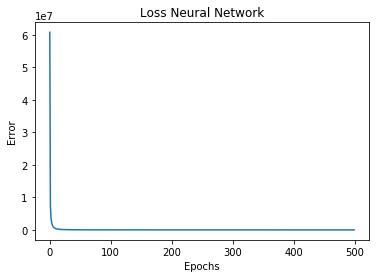

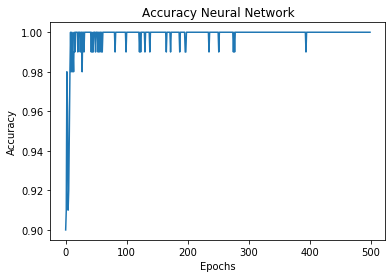

In [20]:
# Graph error
def graph_error(err_vector):

    plt.figure(0)
    plt.plot(err_vector)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Loss Neural Network')
    plt.show()
    
#Graph accuracy
def graph_accuracy(accuracy):
    plt.figure(0)
    plt.plot(accuracy)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Neural Network')
    plt.show()

graph_error(loss)
graph_accuracy(accuracy)